In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [3]:
print("Image Data Shape", digits.data.shape)
print("Label data Shape", digits.data.shape)

Image Data Shape (1797, 64)
Label data Shape (1797, 64)


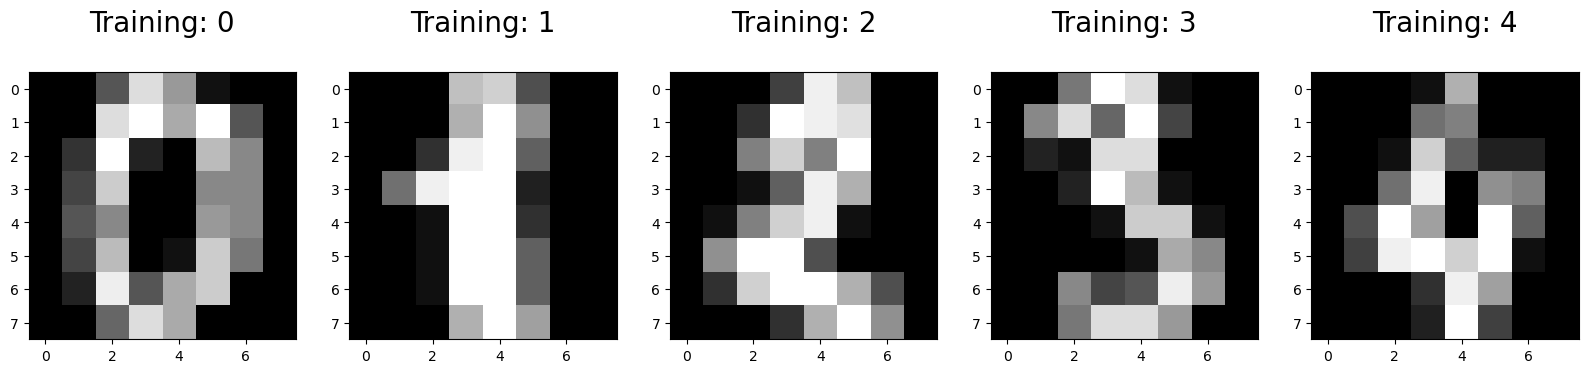

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title("Training: %i\n" %label, fontsize = 20)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state = 2)

In [15]:
print(x_train.shape)

(1383, 64)


In [16]:
print(y_train.shape)

(1383,)


In [17]:
print(x_test.shape)

(414, 64)


In [19]:
print(y_test.shape)

(414,)


In [20]:
from sklearn.linear_model import LogisticRegression

In [23]:
logisticRegr = LogisticRegression(max_iter = 500)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [24]:
print(logisticRegr.predict(x_test[0].reshape(1, -1)))

[4]


In [25]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [27]:
predictions = logisticRegr.predict(x_test)

In [30]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9516908212560387


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [33]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


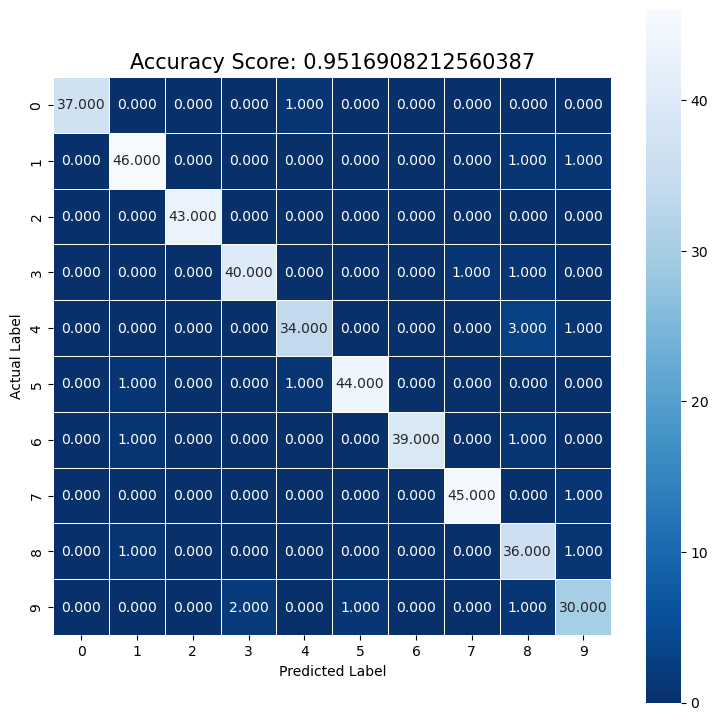

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt=".3f", linewidth = .5, square = True, cmap = "Blues_r");
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size = 15);

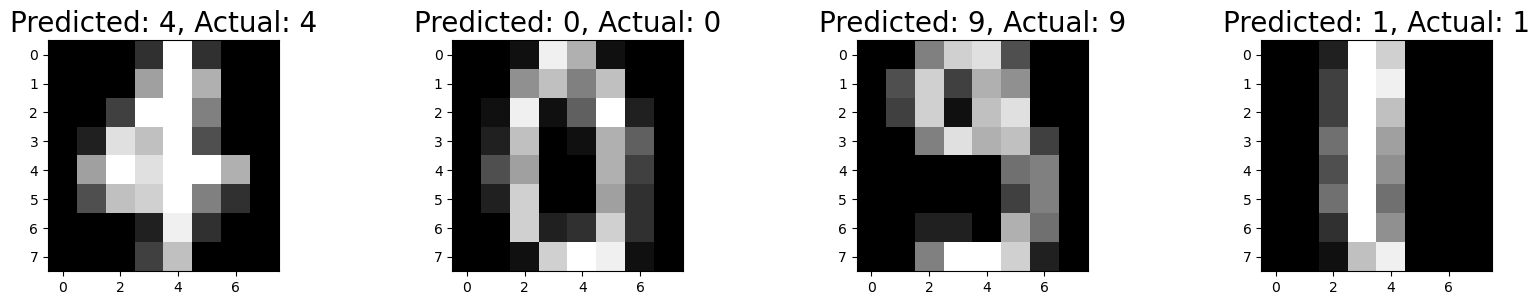

In [37]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize = 20)